# Exploratory Data Analysis - EDA

In [2]:
## CALLING LIBRARIES USED FOR EDA

library("tidyverse")
library("ggplot2")

In [3]:
## STORING DATA IN THE CSV FILE TO VARIABLE "data"
data = read.csv('C:/Users/T0SHIBA/DataScienceInR/data/Mulitple LR_Cars.csv')

In [4]:
## VIEWING THE FIRST 6 ROWS USING HEAD() FUNCTION
head(data)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
4200,BMW,sedan,277,2.0,Petrol,yes,1991
7900,Mercedes-Benz,van,427,2.9,Diesel,yes,1999
13300,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003
23000,Audi,crossover,240,4.2,Petrol,yes,2007
18300,Toyota,crossover,120,2.0,Petrol,yes,2011
199999,Mercedes-Benz,crossover,0,5.5,Petrol,yes,2016


## 1. VARIABLE IDENTIFICATION

##### CONTINUOUS OR CATAGORICAL

###### Continuous Variables : Price , Mileage , EngineV , Year

###### Catagorical Variables : Brand , Body , Engine.Type , Registration

## 2. TREATMENT OF MISSING VALUES

In [5]:
## TAKING COUNT OF MISSING VALUES IN THE DATASET
colSums(is.na(data))

Price        Brand         Body      Mileage      EngineV  Engine.Type 
         172            0            0            0          150            0 
Registration         Year 
           0            0

### Here, missing values are in columns : Price & EngineV

In [6]:
## CHECKING NUMBER OF COLUMNS AND ROWS
dim(data)

[1] 4345    8

##### Here the number of null value rows are very less considered to the total data, hence the null values are deleted

In [7]:
## DELETING NULL VALUE ROWS
data = na.omit(data)

In [8]:
colSums(is.na(data))

Price        Brand         Body      Mileage      EngineV  Engine.Type 
           0            0            0            0            0            0 
Registration         Year 
           0            0

In [9]:
## NUMBER OF ROWS AND COLUMNS AFTER DELETING NULL VALUES
dim(data)

[1] 4025    8

## 3. TREATMENT OF OUTLIERS

##### OUTLIERS NEED TO BE CHECKED AND TREATED FOR CONTINOUS VARIABLES

##### I. PRICE

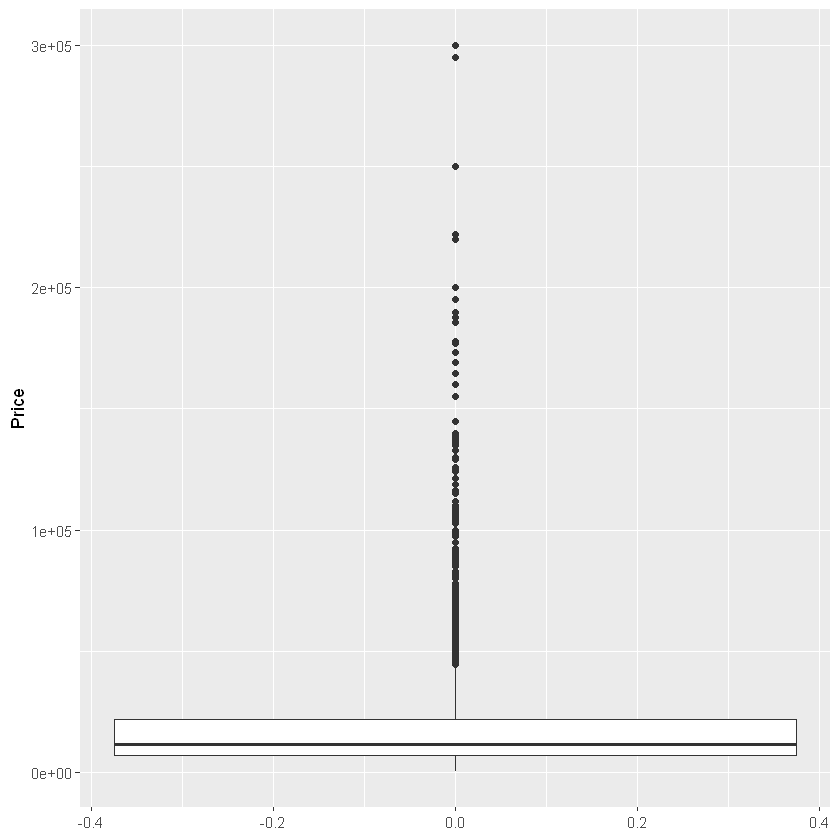

In [10]:
## CHECKING FOR OUTLIERS WITH BOXPLOT
ggplot(data=data,aes(y=Price))+ geom_boxplot()

In [11]:
## FINDING INTER QUARTILE RANGE TO CALCULATE MAXIMUM VALUE OF DISTRIBUTION USING "IQR" FUNCTION
iqr_price = IQR(data$Price)

In [12]:
iqr_price

[1] 14901

In [13]:
## QUANTILE FUNTION WILL GIVE US THE IMPORTANT QUARTILES
quantile(data$Price)

0%    25%    50%    75%   100% 
   600   6999  11500  21900 300000

In [14]:
## WITH "PROBS" ATTIBUTE WE CAN SPECIFY THE PARTICULAR QUANTILE NEEDED (IT SHOULD BE BETWEEN 0 AND 1)
quantile(data$Price,probs=0.75)

75% 
21900

In [15]:
## MAX VALUE OF PRICE IS CALCULATED USING FORMULA "Q3 + (1.5*IQR)"
max_price = quantile(data$Price,probs=0.75)+ (1.5*iqr_price)

In [16]:
max_price

75% 
44251.5

In [17]:
## FILTERING DATA WHERE PRICE ABOVE THE MAXIMUM PRICE
filter(data,Price>max_price)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
199999.00,Mercedes-Benz,crossover,0,5.50,Petrol,yes,2016
67500.00,BMW,crossover,1,2.50,Diesel,yes,2016
63000.00,Mercedes-Benz,crossover,86,5.50,Petrol,yes,2009
133000.00,BMW,crossover,7,4.40,Petrol,yes,2015
50000.00,Mercedes-Benz,sedan,240,3.50,Petrol,yes,2006
69999.00,Audi,crossover,21,3.00,Petrol,yes,2015
107999.00,Mercedes-Benz,crossover,0,2.98,Diesel,yes,2016
45500.00,BMW,crossover,76,4.40,Petrol,yes,2010
47000.00,BMW,other,5,2.00,Petrol,yes,2014
46800.00,BMW,sedan,33,2.00,Diesel,yes,2014


In [18]:
## ASSGINING VALUES TO FIND QUANTILES
quantile_range = seq(0.75,0.99,by=0.01)

In [19]:
quantile_range

[1] 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
[16] 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99

In [20]:
## USING QUANTILE FUNCTION CALLING QUANTILES FROM 75TH TO 99TH 
quantile(data$Price,probs=quantile_range)

75%       76%       77%       78%       79%       80%       81%       82% 
 21900.00  22500.00  23200.00  23999.00  24798.00  25500.00  26999.44  28500.00 
      83%       84%       85%       86%       87%       88%       89%       90% 
 29000.00  30500.00  32000.00  33709.92  35280.59  37000.00  39000.00  40996.00 
      91%       92%       93%       94%       95%       96%       97%       98% 
 43983.16  47316.00  51500.00  56500.00  64820.00  70000.00  81639.72 103999.00 
      99% 
129812.52

##### Here we already know the max price value 44251.5. So the outliers will be filled with quantile of value less than max value. 
Quantile 90 = 40996 is used to fill outliers 

In [21]:
## USING FOR LOOPS CHANGING VALUES
for (i in 1:4025)
{
    if (data$Price[i]>max_price){
        data$Price[i]=quantile(data$Price,probs=0.90)}
}

In [22]:
filter(data,Price>max_price)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year


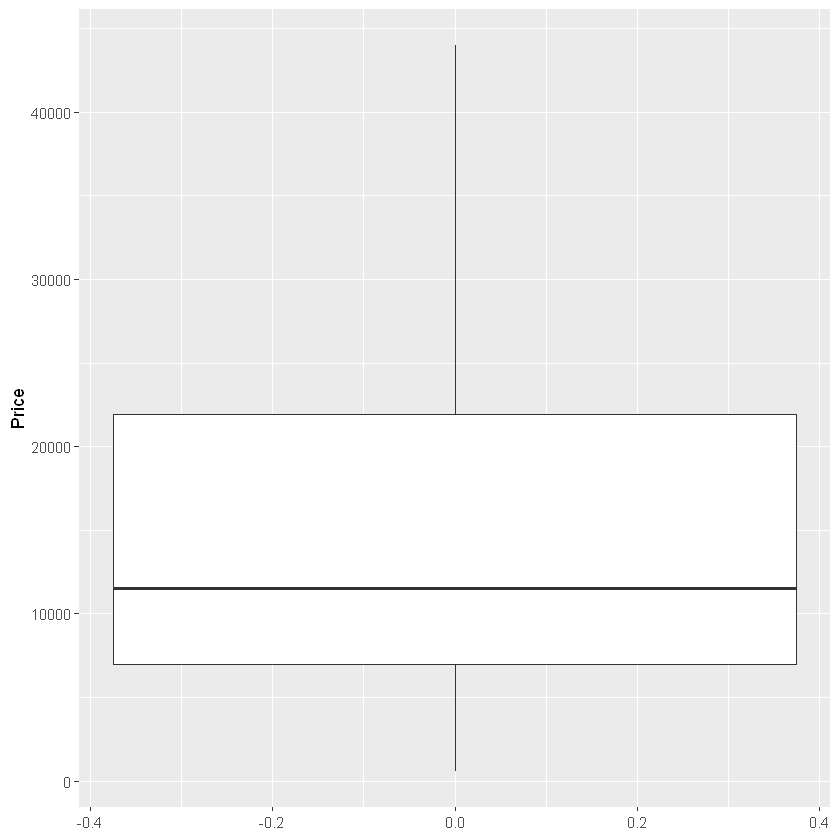

In [23]:
## BOXPLOT FOR PRICE TO CHECK FOR OUTLIERS
ggplot(data=data,aes(y=Price))+ geom_boxplot()

##### II. MILEAGE

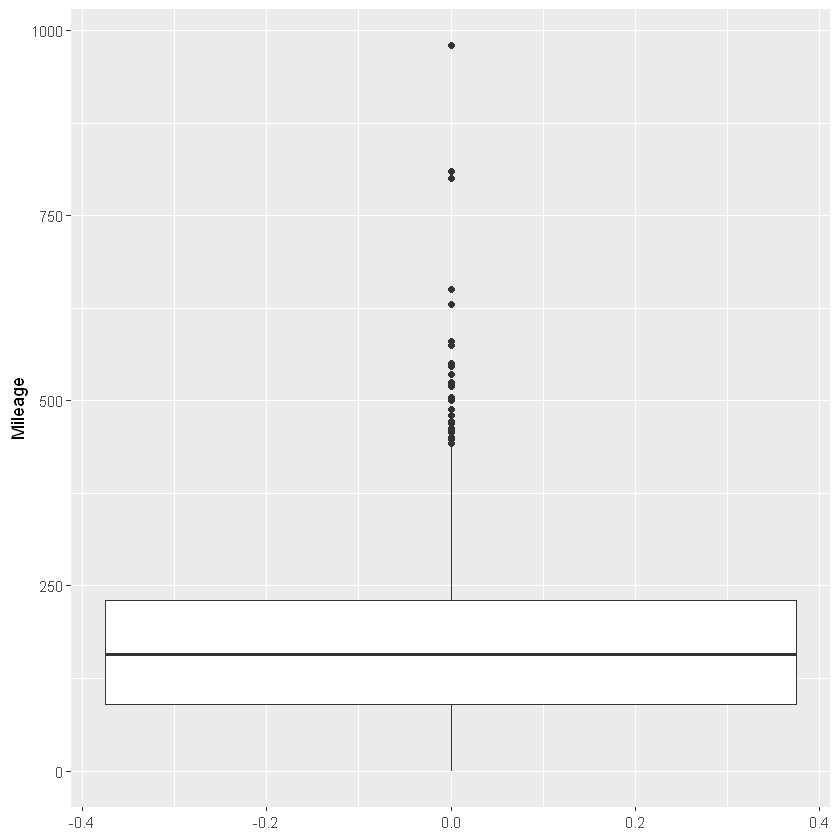

In [24]:
## CHECKING FOR OUTLIERS WITH BOXPLOT
ggplot(data=data,aes(y=Mileage))+ geom_boxplot()

In [25]:
## FINDING INTER QUARTILE RANGE TO CALCULATE MAXIMUM VALUE OF DISTRIBUTION USING "IQR" FUNCTION
iqr_mileage= IQR(data$Mileage)

In [26]:
iqr_mileage

[1] 140

In [27]:
## WITH "PROBS" ATTIBUTE WE CAN SPECIFY THE PARTICULAR QUANTILE NEEDED (IT SHOULD BE BETWEEN 0 AND 1)
quantile(data$Mileage,probs=0.75)

75% 
230

In [28]:
## MAX VALUE OF PRICE IS CALCULATED USING FORMULA "Q3 + (1.5*IQR)"
max_mileage = quantile(data$Mileage,probs=0.75)+ (1.5*iqr_mileage)

In [29]:
max_mileage

75% 
440

In [30]:
## FILTERING DATA WHERE MILEAGE ABOVE THE MAXIMUM MILEAGE
filter(data,Price>max_mileage)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
4200,BMW,sedan,277,2.00,Petrol,yes,1991
7900,Mercedes-Benz,van,427,2.90,Diesel,yes,1999
13300,Mercedes-Benz,sedan,358,5.00,Gas,yes,2003
23000,Audi,crossover,240,4.20,Petrol,yes,2007
18300,Toyota,crossover,120,2.00,Petrol,yes,2011
40996,Mercedes-Benz,crossover,0,5.50,Petrol,yes,2016
6100,BMW,sedan,438,2.00,Gas,yes,1997
14200,Audi,vagon,200,2.70,Diesel,yes,2006
10799,Renault,vagon,193,1.50,Diesel,yes,2012
1400,Volkswagen,other,212,1.80,Gas,no,1999


In [31]:
## USING QUANTILE FUNCTION CALLING QUANTILES FROM 75TH TO 99TH 
quantile(data$Mileage,probs=quantile_range)

75%    76%    77%    78%    79%    80%    81%    82%    83%    84%    85% 
230.00 233.00 238.00 240.00 245.00 250.00 250.00 254.00 260.00 263.00 270.00 
   86%    87%    88%    89%    90%    91%    92%    93%    94%    95%    96% 
272.64 280.00 281.12 288.00 297.00 300.00 303.00 315.00 326.00 340.80 358.08 
   97%    98%    99% 
375.56 400.00 434.52

In [32]:
## USING FOR LOOPS CHANGING VALUES
for (i in 1:4025)
{
    if (data$Mileage[i]>max_mileage)
    {
        data$Mileage[i]=quantile(data$Mileage,probs=0.98)
    }
}

In [33]:
filter(data,Price>max_price)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year


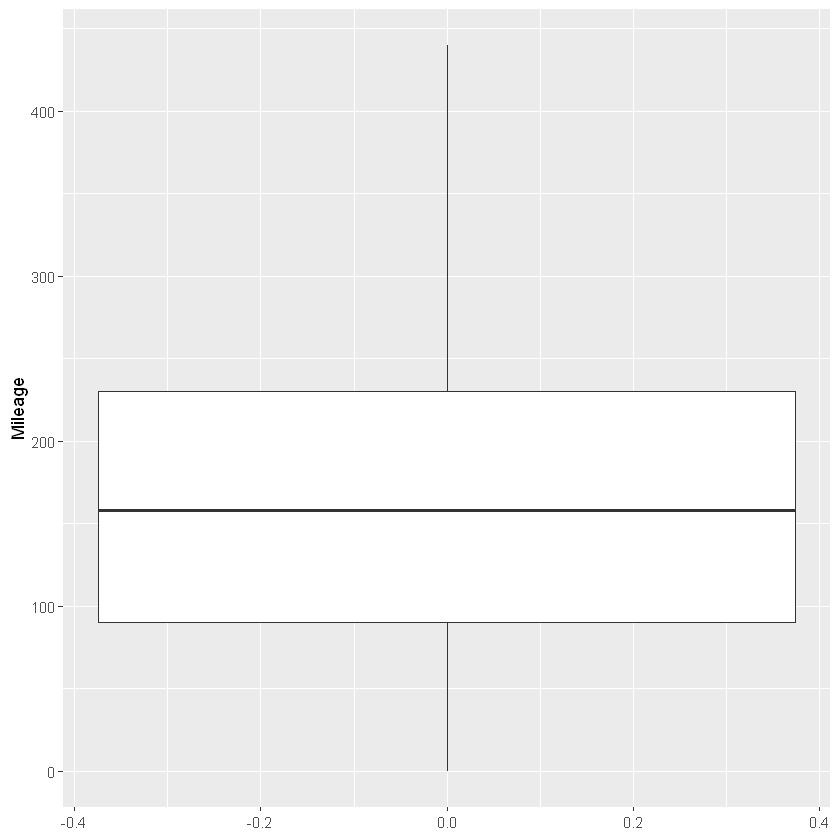

In [34]:
## CHECKING FOR OUTLIERS WITH BOXPLOT
ggplot(data=data,aes(y=Mileage))+ geom_boxplot()